# Multi-CPU Profile

This python notebook illustrates multi-cpu profile of Siam Quantum 2 using single point calculations on fellerene C60 molecule. All calculations allocate the total of 1.2 GB of memory. Because the way the option `-MAXMEM=INT` is implemented in SQ, the INT are set to `1200,600,400,300,240` for the number of cpu `1,2,3,4,5` respectively.

Please see the output files of the calculations in the folder `validate/sq/c60` for details and the exact options begin used.

For this test, the **Phone** is the Huawei Y7 2019 phone, using Qualcomm Snapdragon 450 CPU and 4.0 GB of memory, running Siam Quantum android port installed; whereas the **Macbook** is the Apple Macbook Pro, using Apple M1 Pro CPU and 16.0 GB of memory, running Siam Quantum 2 compiled within the macos environment.

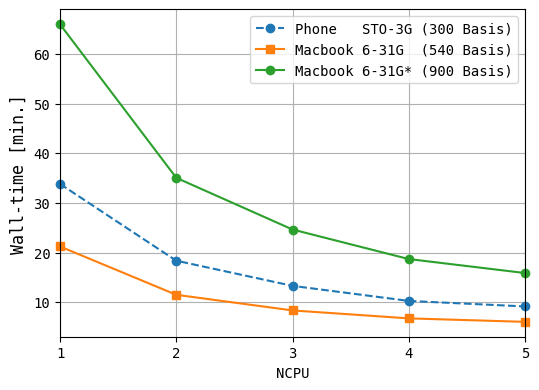

In [51]:
from datetime import datetime


#
# These data sets are from folder validate/sq/c60
#

raw_android = [['Jan 06, 2026 - 14:17:36','Jan 06, 2026 - 14:51:27'],
               ['Jan 06, 2026 - 15:08:31','Jan 06, 2026 - 15:26:54'],
               ['Jan 06, 2026 - 15:30:09','Jan 06, 2026 - 15:43:28'],
               ['Jan 06, 2026 - 16:03:51','Jan 06, 2026 - 16:14:08'],
               ['Jan 06, 2026 - 14:04:27','Jan 06, 2026 - 14:13:37']]

raw_631g = [['Jan 06, 2026 - 14:40:25','Jan 06, 2026 - 15:01:40'],
            ['Jan 06, 2026 - 14:28:25','Jan 06, 2026 - 14:39:56'],
            ['Jan 06, 2026 - 14:18:29','Jan 06, 2026 - 14:26:51'],
            ['Jan 06, 2026 - 14:10:05','Jan 06, 2026 - 14:16:51'],
            ['Jan 06, 2026 - 14:03:07','Jan 06, 2026 - 14:09:11']]

raw_631gstar = [['Jan 06, 2026 - 15:10:21','Jan 06, 2026 - 16:16:21'],
                ['Jan 06, 2026 - 18:26:47','Jan 06, 2026 - 19:01:52'],
                ['Jan 06, 2026 - 19:02:58','Jan 06, 2026 - 19:27:38'],
                ['Jan 06, 2026 - 19:46:09','Jan 06, 2026 - 20:04:52'],
                ['Jan 06, 2026 - 20:18:25','Jan 06, 2026 - 20:34:19']
               ]

def minutes_diff(raw):
    begin = datetime.strptime(raw[0], "%b %d, %Y - %H:%M:%S")
    end = datetime.strptime(raw[1], "%b %d, %Y - %H:%M:%S")

    duration = end - begin
    minutes = duration.total_seconds() / 60

    return minutes

def minutes_set(raw):
    mins = []
    for i in range(len(raw)):
        mins.append(minutes_diff(raw[i]))

    return mins


import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(6, 4.25))
ax.plot([1,2,3,4,5],minutes_set(raw_android),'o--',clip_on=False,label='Phone   STO-3G (300 Basis)')
ax.plot([1,2,3,4,5],minutes_set(raw_631g),'s-',clip_on=False,label='Macbook 6-31G  (540 Basis)')
ax.plot([1,2,3,4,5],minutes_set(raw_631gstar),'o-',clip_on=False,label='Macbook 6-31G* (900 Basis)')
plt.legend(fontsize=10)
plt.xticks([1,2,3,4,5])
plt.grid()
plt.xlim(1,5)
#plt.ylim(5,70)
plt.xlabel('NCPU',fontsize=10)
plt.ylabel('Wall-time [min.]',fontsize=12)
#plt.title('Single Point Calculations on Fullerene C60')
#plt.savefig('multicpu.svg',transparent=True)
plt.show()

